### Raffi Argianda
### 221351112
### Malam B

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('net_detection.csv')
df.head()

,src_ip,dst_ip,protocol,src_port,dst_port,bytes_sent,bytes_received,duration,packet_count,attack_type
0,39.170.115.188,133.204.219.238,TCP,1762,62458,3422,5989,213,131,normal
1,80.35.125.105,246.113.106.207,TCP,32718,9699,3736,989,277,96,normal
2,49.134.137.30,151.26.62.67,TCP,1225,43970,2865,5943,305,89,ddos
3,157.51.229.193,175.153.3.55,TCP,20804,303,1852,9389,552,80,normal
4,121.123.112.174,72.234.63.118,UDP,15457,17942,8318,5160,533,46,normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   src_ip          2000 non-null   object
 1   dst_ip          2000 non-null   object
 2   protocol        2000 non-null   object
 3   src_port        2000 non-null   int64 
 4   dst_port        2000 non-null   int64 
 5   bytes_sent      2000 non-null   int64 
 6   bytes_received  2000 non-null   int64 
 7   duration        2000 non-null   int64 
 8   packet_count    2000 non-null   int64 
 9   attack_type     2000 non-null   object
dtypes: int64(6), object(4)
memory usage: 156.4+ KB


### Exploratory data analysis

In [5]:
# Menghitung jumlah data yang ada pada kolom protocol
protocol_counts = df['protocol'].value_counts()
protocol_counts

protocol
TCP     676
UDP     674
ICMP    650
Name: count, dtype: int64

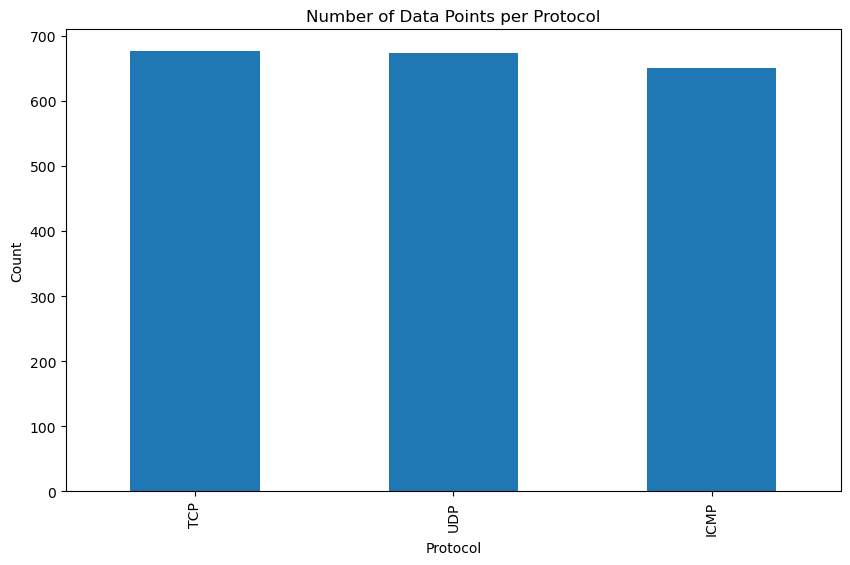

In [6]:
# Membuat bar plot hasil perhitungan kolom protocol
plt.figure(figsize=(10,6))
protocol_counts.plot(kind='bar')
plt.title('Number of Data Points per Protocol')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()

Lakukan perhitungan untuk mendapatkan jumlah pada kolom "attack_type" dan buatkan bar plotnya

In [7]:
attack_type_counts = df['attack_type'].value_counts()
attack_type_counts

attack_type
normal         1842
ddos             43
brute_force      43
icmp_flood       40
port_scan        32
Name: count, dtype: int64

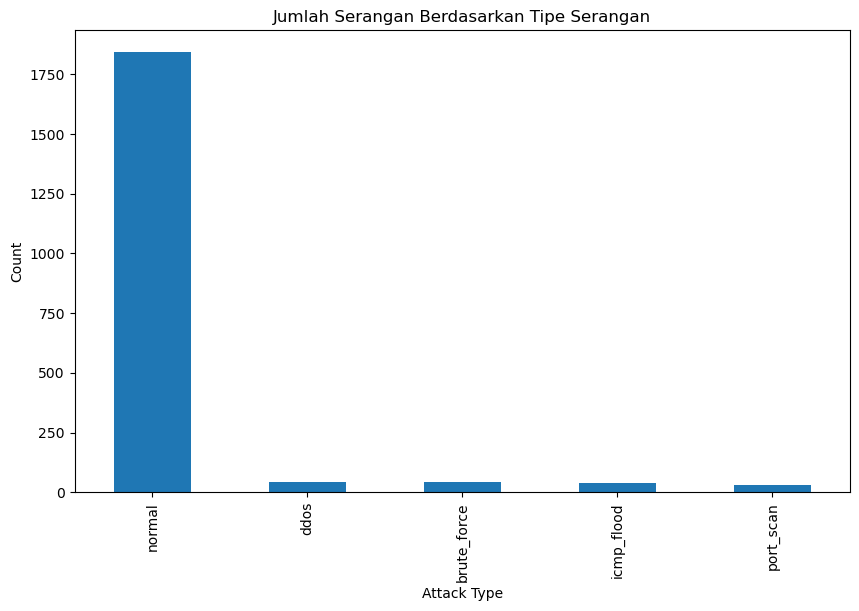

In [8]:
# Membuat bar plot hasil perhitungan kolom attack_type
plt.figure(figsize=(10,6))
attack_type_counts.plot(kind='bar')
plt.title('Jumlah Serangan Berdasarkan Tipe Serangan')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

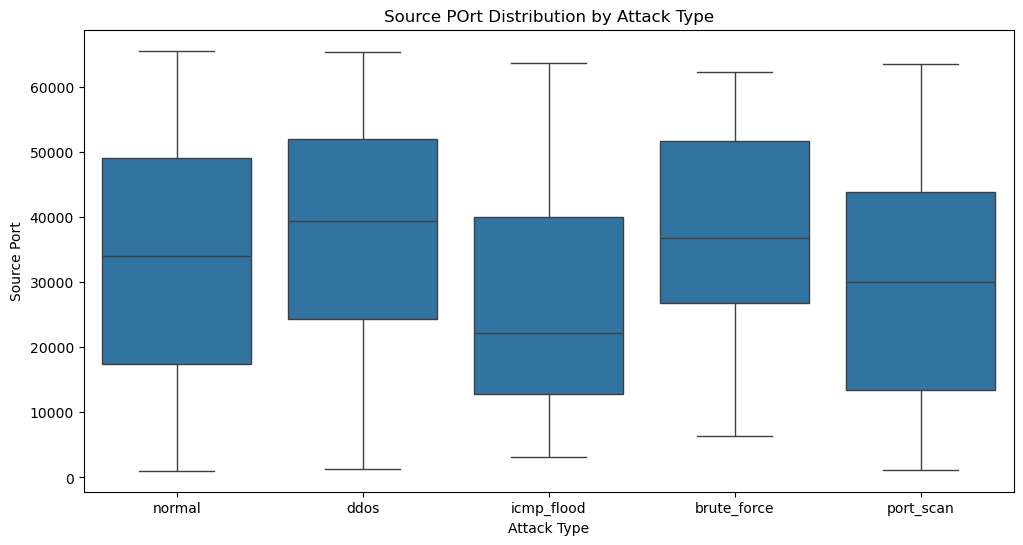

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'attack_type', y = 'src_port')
plt.title('Source POrt Distribution by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Source Port')
plt.show()

Buatkan boxplot untuk menampilkan bytes_sent dan berdasarkan jenis protocol

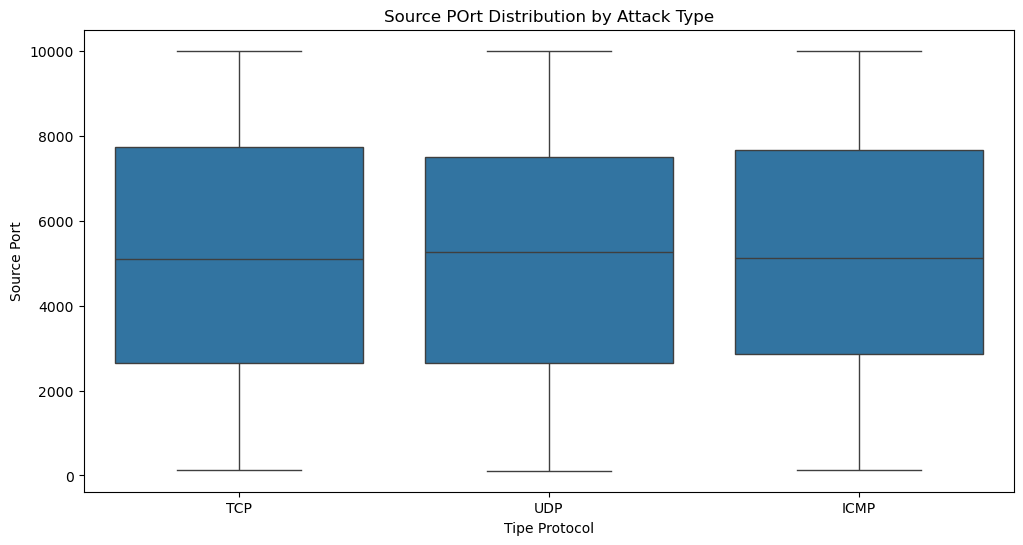

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'protocol', y = 'bytes_sent')
plt.title('Source POrt Distribution by Attack Type')
plt.xlabel('Tipe Protocol')
plt.ylabel('Source Port')
plt.show()

### Model DBSCAN

In [11]:
# Pilih fitur untuk clustering
features = ['src_port', 'dst_port', 'bytes_sent', 'bytes_received']
x = df[features]

In [12]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
# Implementasi algoritma DBSCAN
# Tentukan nilai epsilon dan min sample

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(x_scaled)
df.head()

,src_ip,dst_ip,protocol,src_port,dst_port,bytes_sent,bytes_received,duration,packet_count,attack_type,dbscan_cluster
0,39.170.115.188,133.204.219.238,TCP,1762,62458,3422,5989,213,131,normal,-1
1,80.35.125.105,246.113.106.207,TCP,32718,9699,3736,989,277,96,normal,0
2,49.134.137.30,151.26.62.67,TCP,1225,43970,2865,5943,305,89,ddos,-1
3,157.51.229.193,175.153.3.55,TCP,20804,303,1852,9389,552,80,normal,-1
4,121.123.112.174,72.234.63.118,UDP,15457,17942,8318,5160,533,46,normal,0


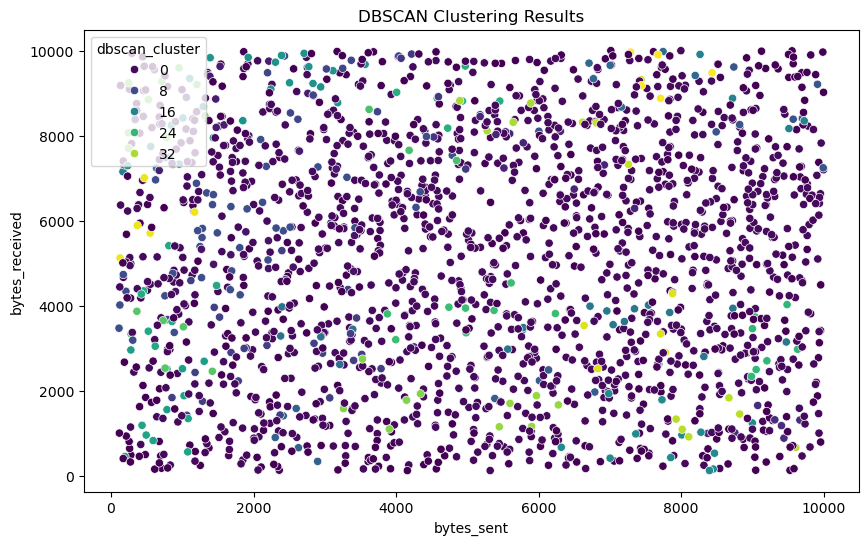

In [14]:
# Plot Hasil Cluster
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'bytes_sent', y = 'bytes_received', hue = 'dbscan_cluster', palette='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()

In [15]:
df.head()

,src_ip,dst_ip,protocol,src_port,dst_port,bytes_sent,bytes_received,duration,packet_count,attack_type,dbscan_cluster
0,39.170.115.188,133.204.219.238,TCP,1762,62458,3422,5989,213,131,normal,-1
1,80.35.125.105,246.113.106.207,TCP,32718,9699,3736,989,277,96,normal,0
2,49.134.137.30,151.26.62.67,TCP,1225,43970,2865,5943,305,89,ddos,-1
3,157.51.229.193,175.153.3.55,TCP,20804,303,1852,9389,552,80,normal,-1
4,121.123.112.174,72.234.63.118,UDP,15457,17942,8318,5160,533,46,normal,0


In [16]:
# Memisahkan data anomaly yang bernilai -1
df['anomaly'] = df['dbscan_cluster'] == -1

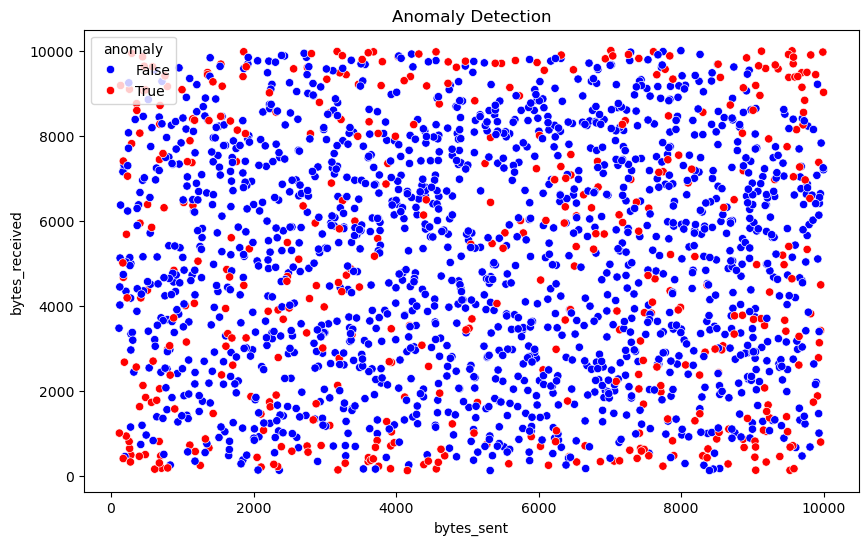

In [17]:
# Plot hasil deteksi anomaly
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'bytes_sent', y = 'bytes_received', hue = 'anomaly', palette=['blue', 'red'])
plt.title('Anomaly Detection')
plt.show()

In [18]:
# Simpan Hasil Cluster
df.to_csv('hasil_dbscan.csv', index = False)

### Profiling hasil cluster

In [19]:
# Membuat df untuk type serangan ddos
ddos_df = df[df['attack_type'] == 'ddos']

In [20]:
# Hitung jumlah anomalynya
anomaly_counts = ddos_df['anomaly'].value_counts()
anomaly_counts

anomaly
False    35
True      8
Name: count, dtype: int64

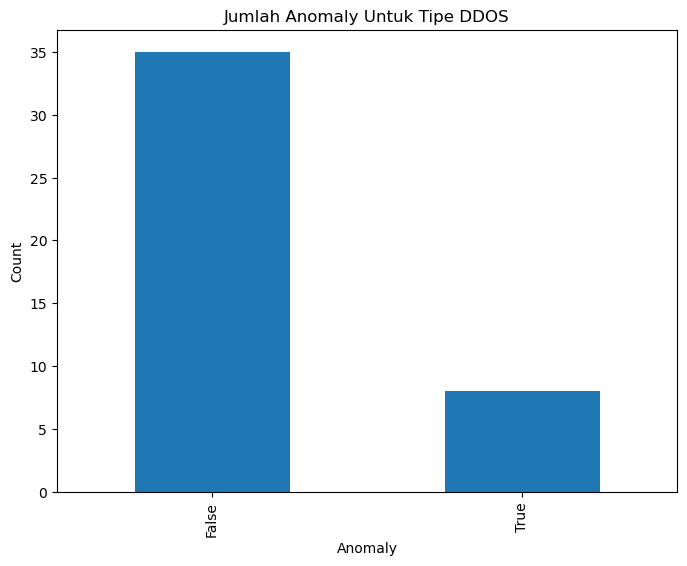

In [21]:
# Bar plot untuk serangan DDOS
plt.figure(figsize=(8,6))
anomaly_counts.plot(kind='bar')
plt.title('Jumlah Anomaly Untuk Tipe DDOS')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()

Lakukan analisis untuk deteksi anomaly pada jenis serangan lainnya seperti brute froce, icmp flood, dan port scan

In [22]:
df['attack_type'].unique()

array(['normal', 'ddos', 'icmp_flood', 'brute_force', 'port_scan'],
      dtype=object)

In [23]:
# Membuat df untuk type serangan brute force, icmp flood, dan port scan
brute_force = df[df['attack_type'] == 'brute_force']
icmp_flood = df[df['attack_type'] == 'icmp_flood']
port_scan = df[df['attack_type'] == 'port_scan']


In [24]:
# Hitung jumlah anomalynya
bf_anomaly_counts = brute_force['anomaly'].value_counts()
if_anomaly_counts = icmp_flood['anomaly'].value_counts()
ps_anomaly_counts = port_scan['anomaly'].value_counts()

print(bf_anomaly_counts, if_anomaly_counts, ps_anomaly_counts)

anomaly
False    35
True      8
Name: count, dtype: int64 anomaly
False    36
True      4
Name: count, dtype: int64 anomaly
False    23
True      9
Name: count, dtype: int64


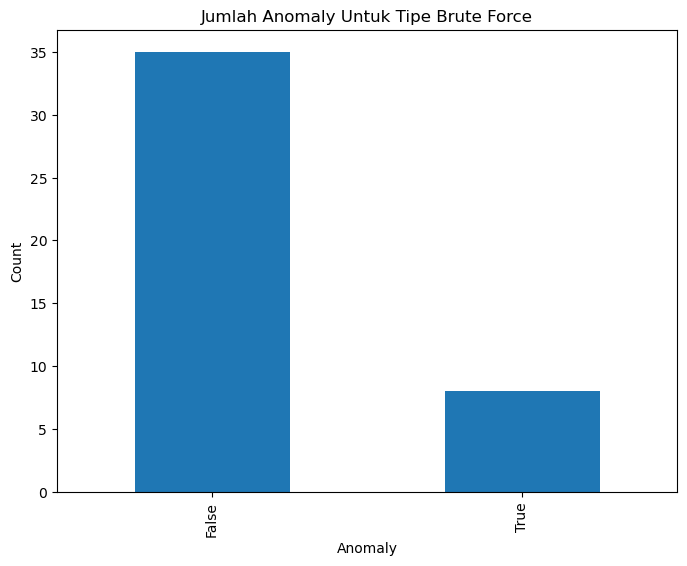

In [25]:
# Bar plot untuk serangan Brute Forece
plt.figure(figsize=(8,6))
bf_anomaly_counts.plot(kind='bar')
plt.title('Jumlah Anomaly Untuk Tipe Brute Force')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()

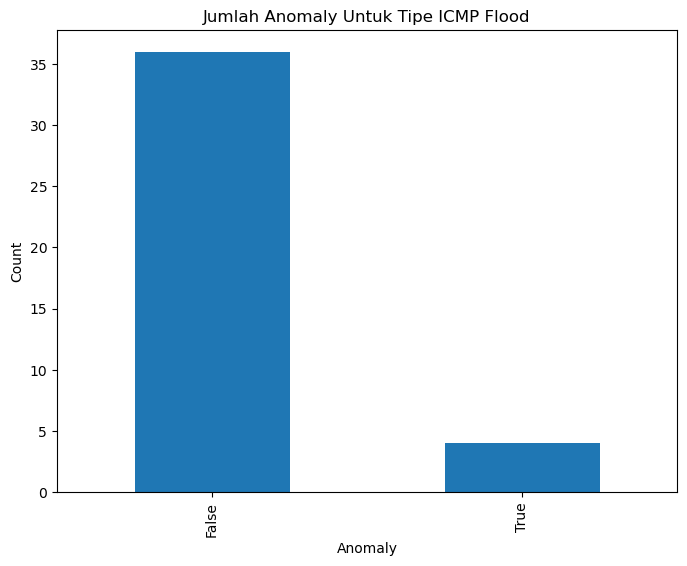

In [26]:
# Bar plot untuk serangan ICMP Flood
plt.figure(figsize=(8,6))
if_anomaly_counts.plot(kind='bar')
plt.title('Jumlah Anomaly Untuk Tipe ICMP Flood')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()

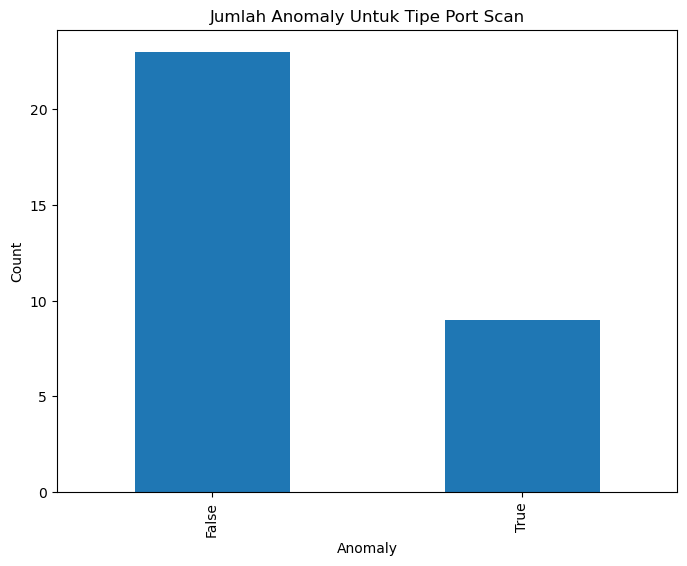

In [27]:
# Bar plot untuk serangan Port Scan
plt.figure(figsize=(8,6))
ps_anomaly_counts.plot(kind='bar')
plt.title('Jumlah Anomaly Untuk Tipe Port Scan')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()